# Magnetostatics Work

### Content:

 * Arbitrary polyhedral prism
     * failure of original method
     * approximation with wires
 * Current trapezoidal prism magnetostatics problem
 * Alternative from textbook
     * infinite square conductor
     * finite square conductor
     * infinitesimal square conductor

### Arbitrary polyhedral prism

Goal was to create magnets with shapes with a variable number of sides, ie the 2d cross section could be a triangle, rectange, pentagon etc, whilst still maintaining the trapezoidal side profile.

[-0.25       -0.34409548  2.        ]


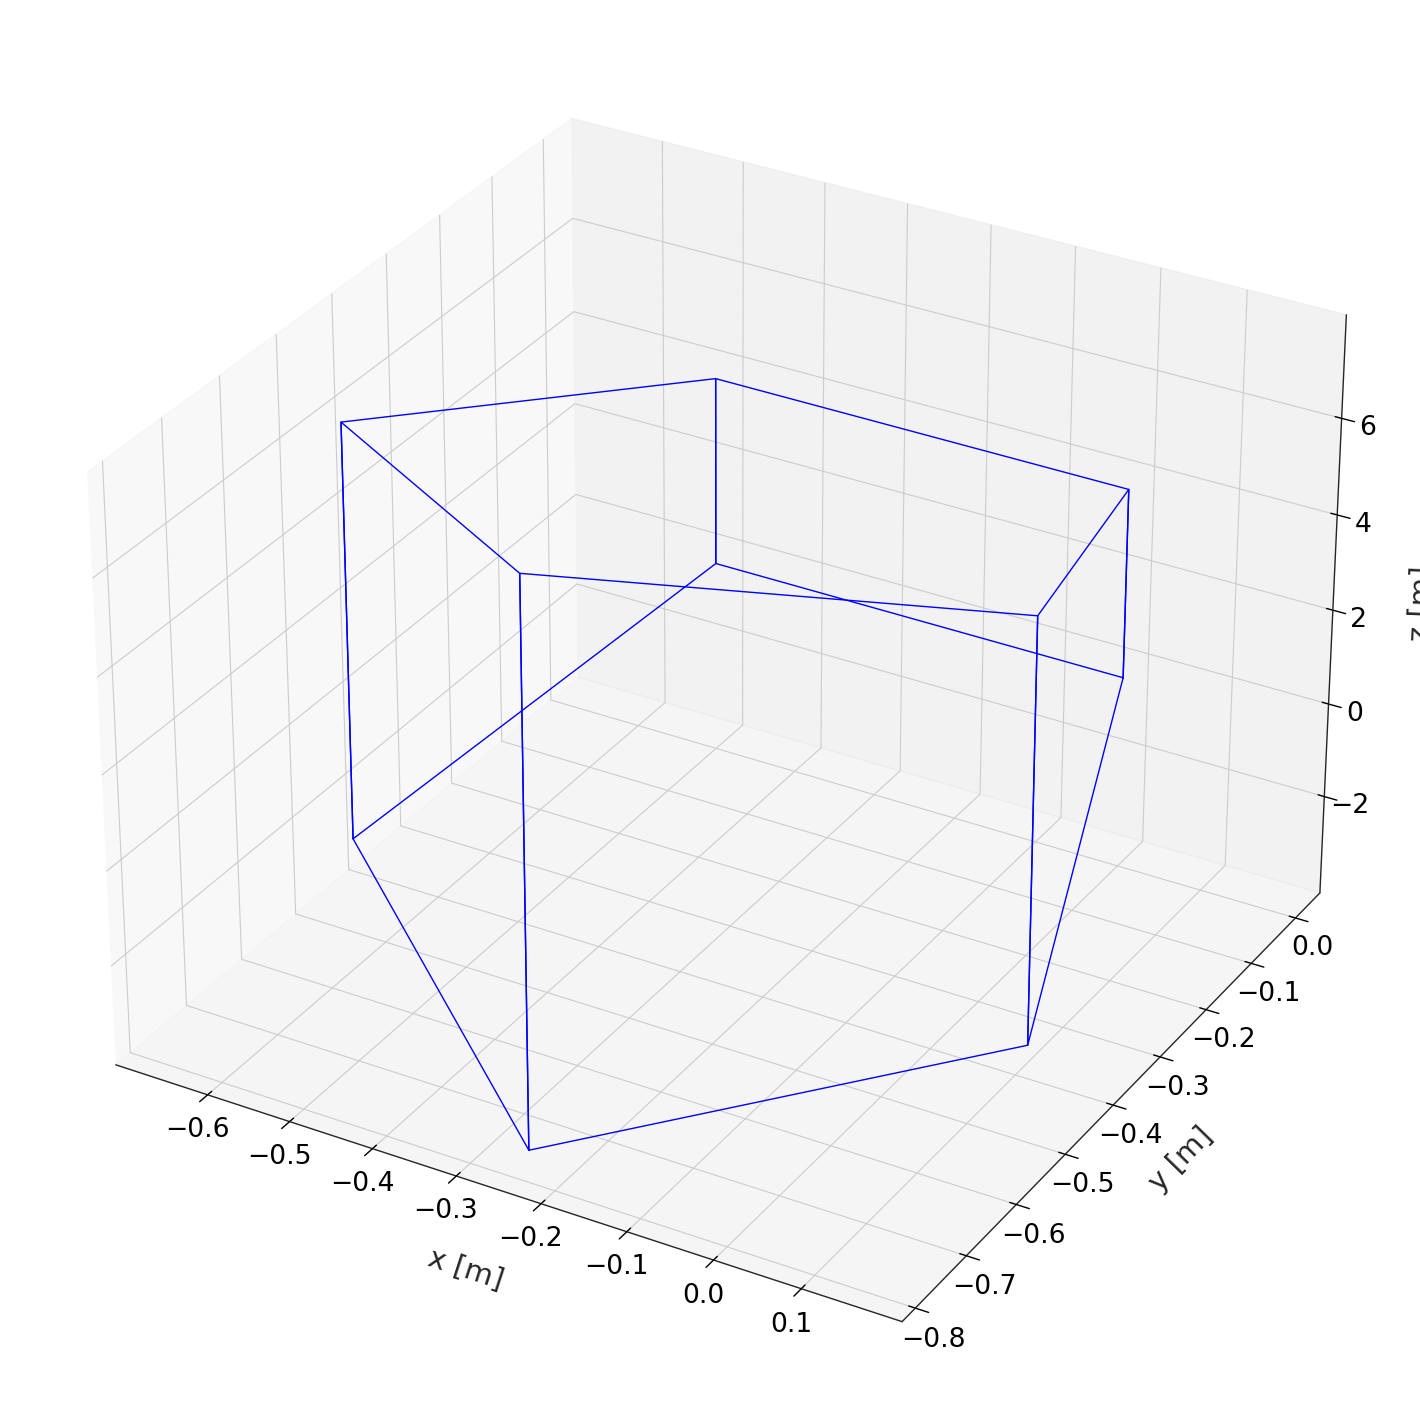

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bluemira.magnetostatics.polyhedral_prism import PolyhedralPrismCurrentSource
from bluemira.utilities.plot_tools import Plot3D

source = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 0, 4]),
    np.array([0, 1, 0]),
    np.array([1, 0, 0]),
    5,
    0.5,
    np.pi * 1 / 16,
    np.pi * 1 / 16,
    np.pi * (5 - 2) / 5,
    "int",
    1e6,
)
ax = Plot3D()
source.plot(ax=ax)
plt.show()

Used magnetostatic equation derived in https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=123865&tag=1 but the result was less than ideal as can be seen...

[-0.25 -0.25  2.  ]


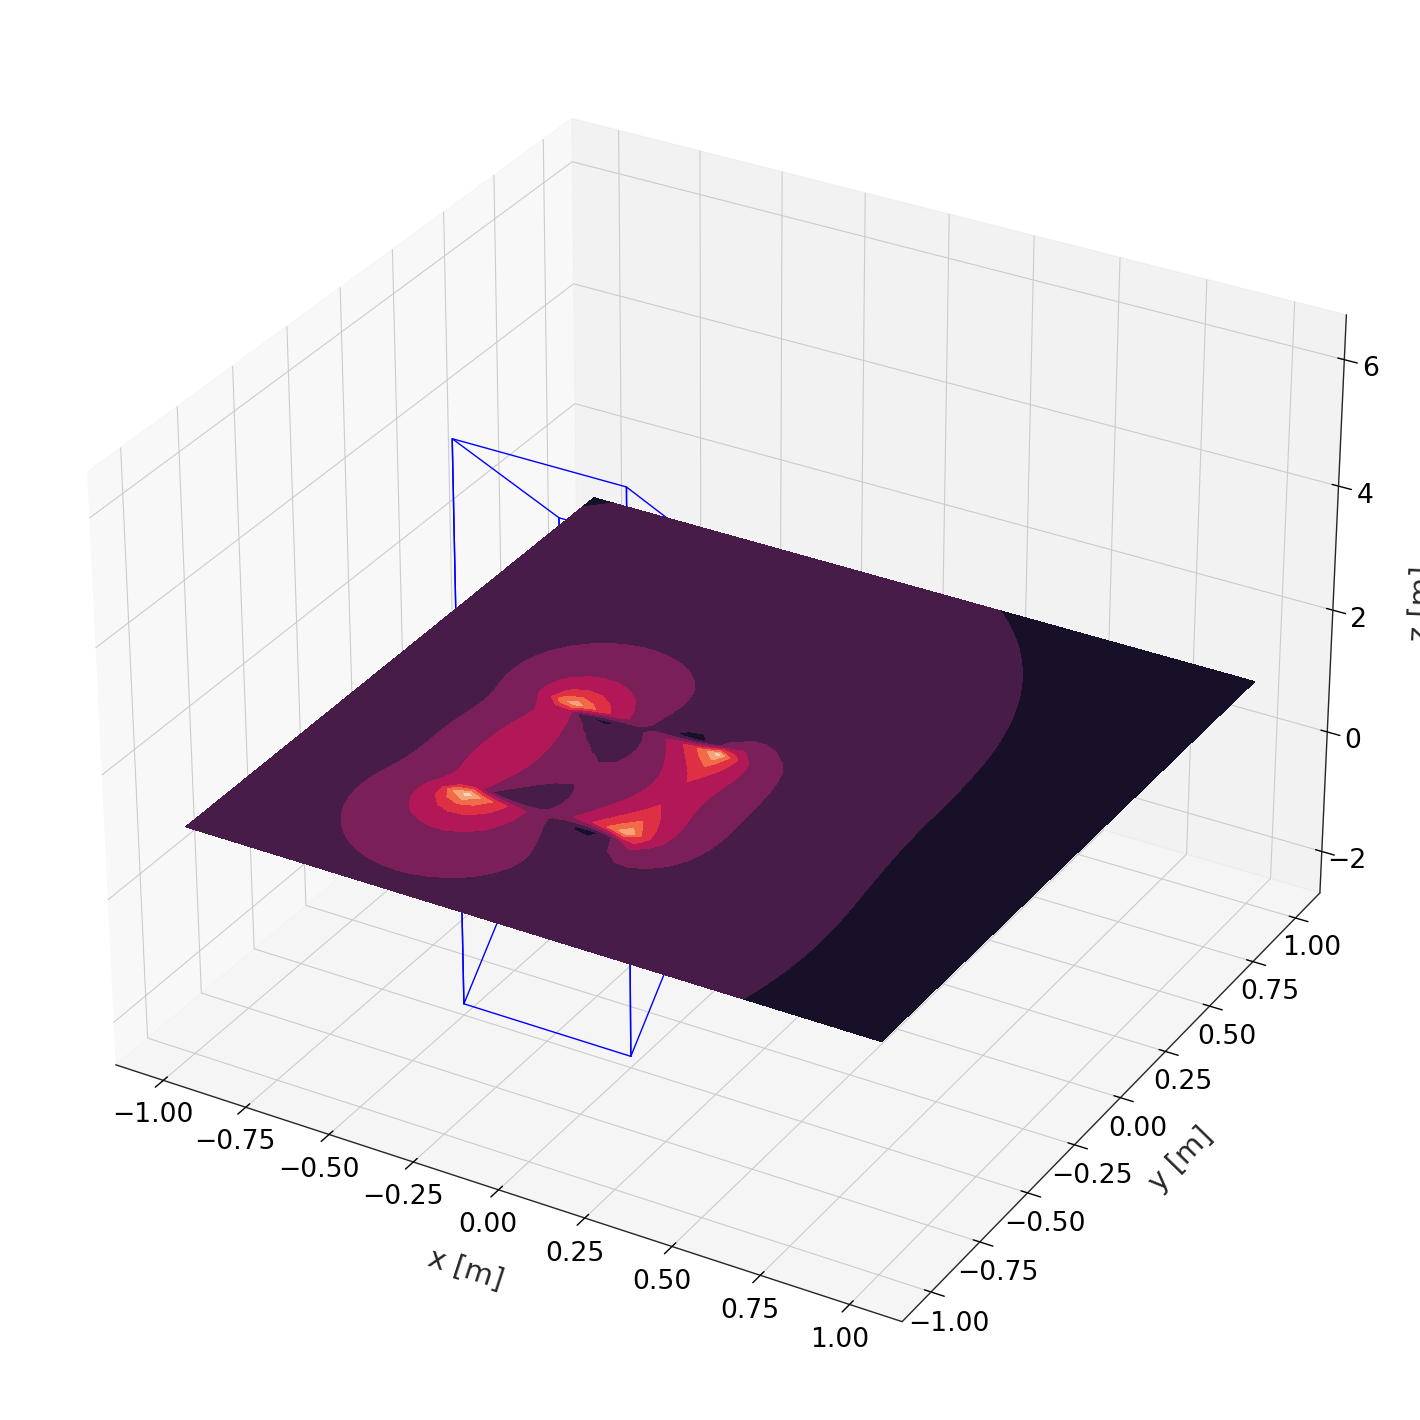

In [3]:
source = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 0, 4]),
    np.array([0, 1, 0]),
    np.array([1, 0, 0]),
    4,
    0.5,
    np.pi * 1 / 16,
    np.pi * 1 / 16,
    np.pi * (4 - 2) / 4,
    "int",
    1e6,
)
ax = Plot3D()
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
xx, yy = np.meshgrid(x, y)
bx, by, bz = source.field(xx, yy, np.ones_like(xx))
b = np.sqrt(bx**2 + by**2 + bz**2)
source.plot(ax=ax)
ax.contourf(xx, yy, b, zdir="z", offset=1.0)
plt.show()

Led to attempting to create a baseline using filaments to get a better understanding of what it should look like for complex cases and also to use as a benchmark.

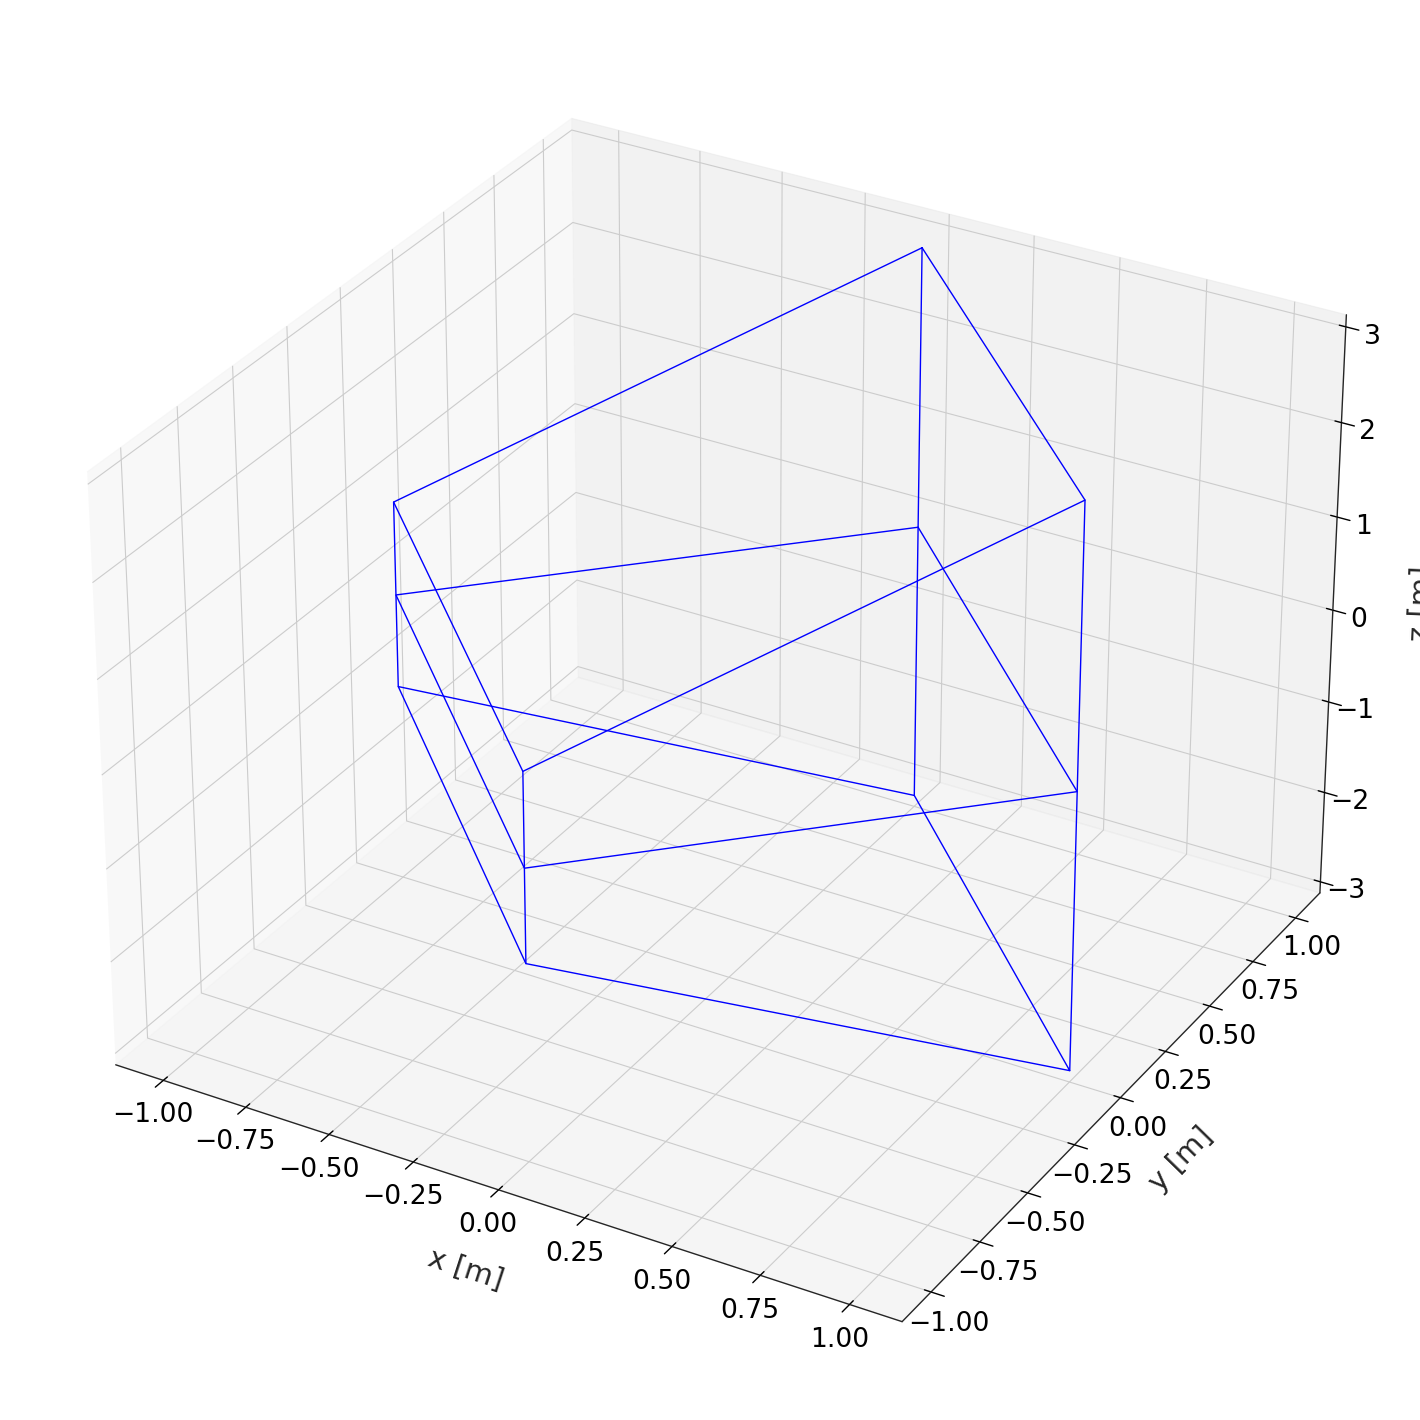

Number of filaments = 180


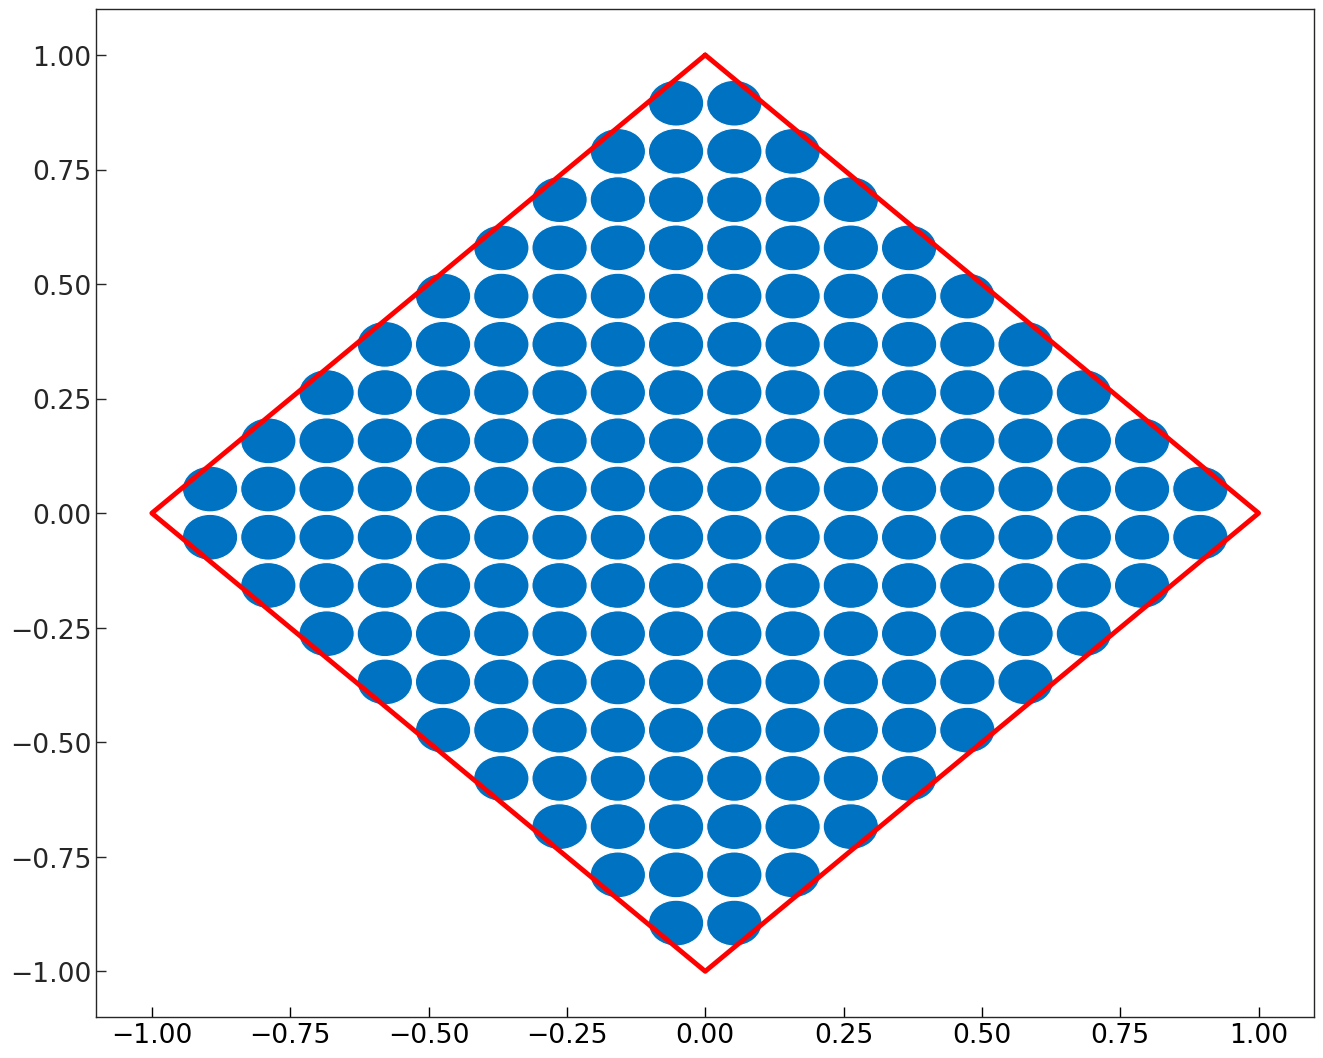

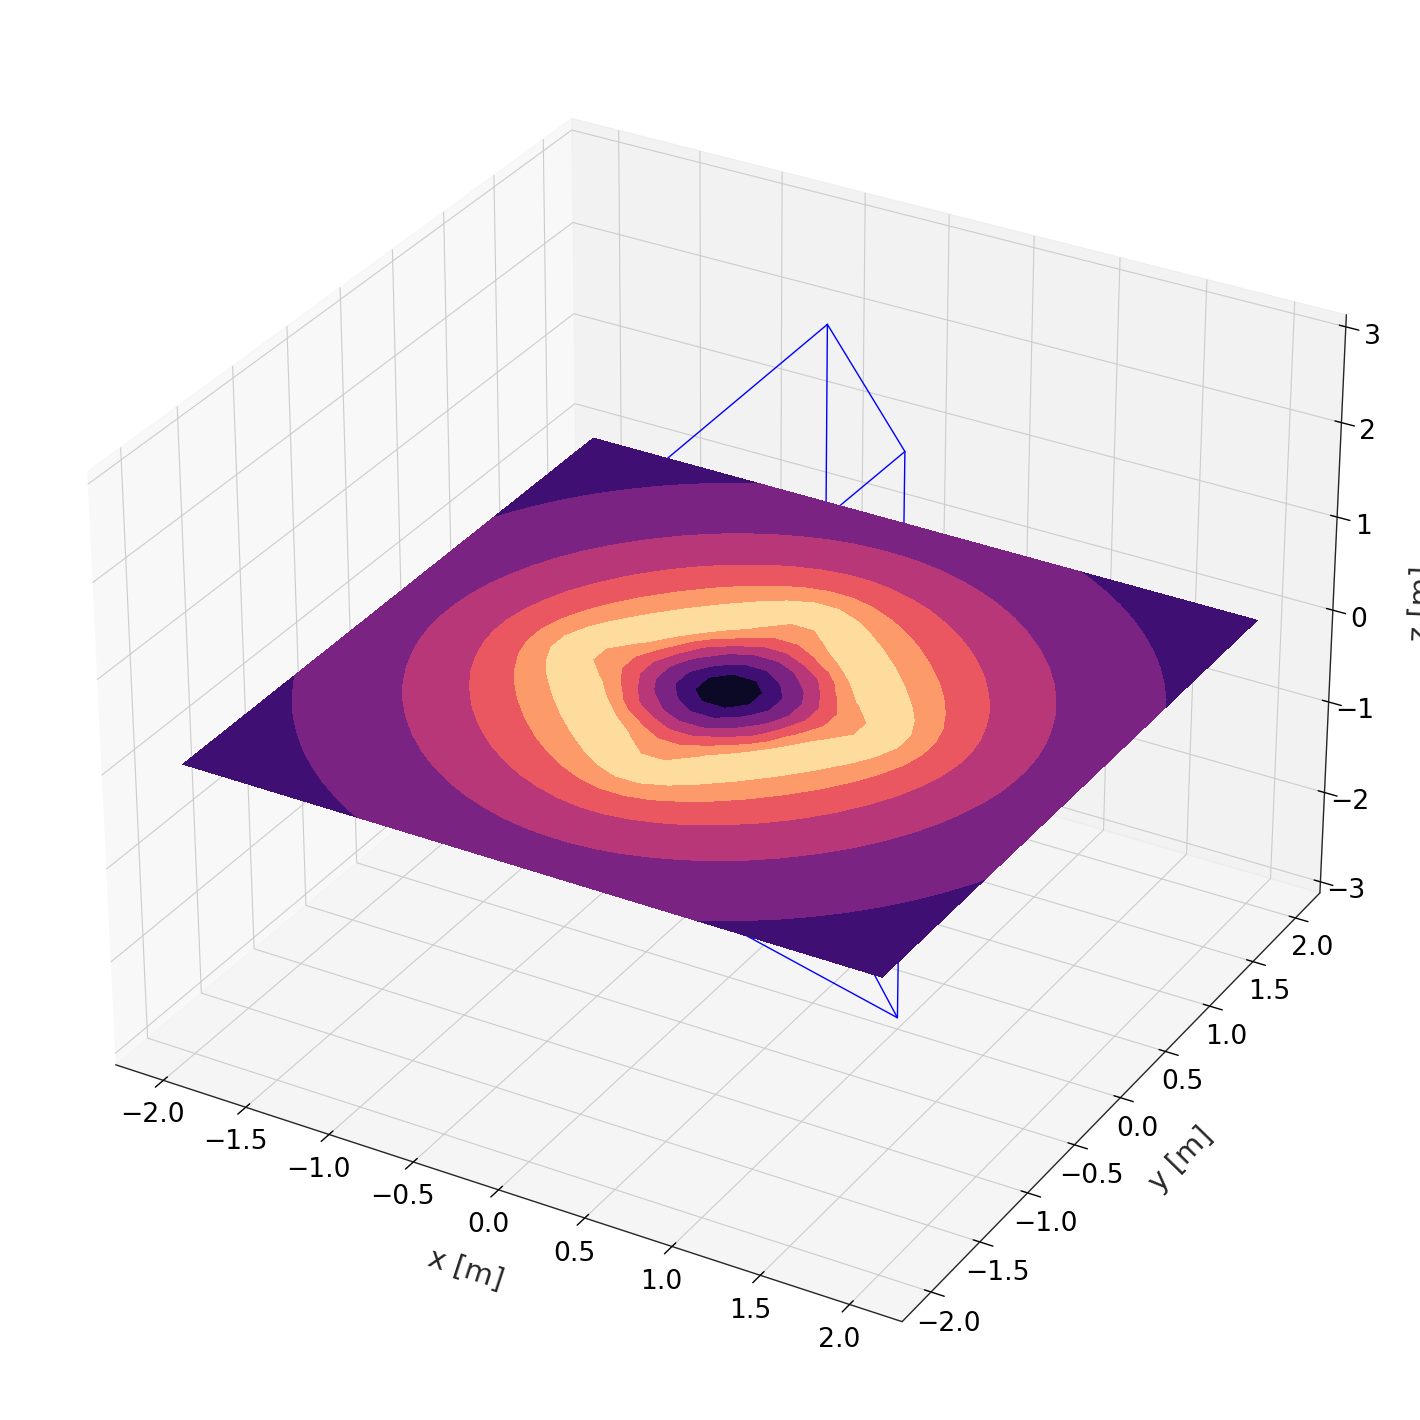

In [4]:
from bluemira.magnetostatics.polyhedral_prism2 import (
    PolyhedralPrismCurrentSource,
    amp_wire,
)

source = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    4,
    2,
    1,
    1e6,
    0.05,
)
ax = Plot3D()
source.plot(ax=ax)
plt.show()
source.filament_plot()
ax = Plot3D()
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
xx, yy = np.meshgrid(x, y)
zz = np.zeros_like(xx)
bx, by, bz = source.field2(xx, yy, zz)
B = np.sqrt(bx**2 + by**2 + bz**2)
source.plot(ax=ax)
ax.contourf(xx, yy, B, zdir="z", offset=0.0, cmap="magma")
plt.show()

Compared to before the magnetostatics profile seems more accurate with what we would expect. However it is still not quite right, especially when compared to current trapezoidal source. Although there does appear to be issues with this as well...

### Current trapezoidal prism magnetostatics problem

The problem with the current trapezoidal source is that there is a mismatch between the location of the peak magnetic field and the surface of the prism (where the maximum should be located). This can be seen below, but the mismatch seems to be be a factor of 2 where either the calculated points are a factor of 2 too small or the magnetic field is taking it a factor of 2 too large.

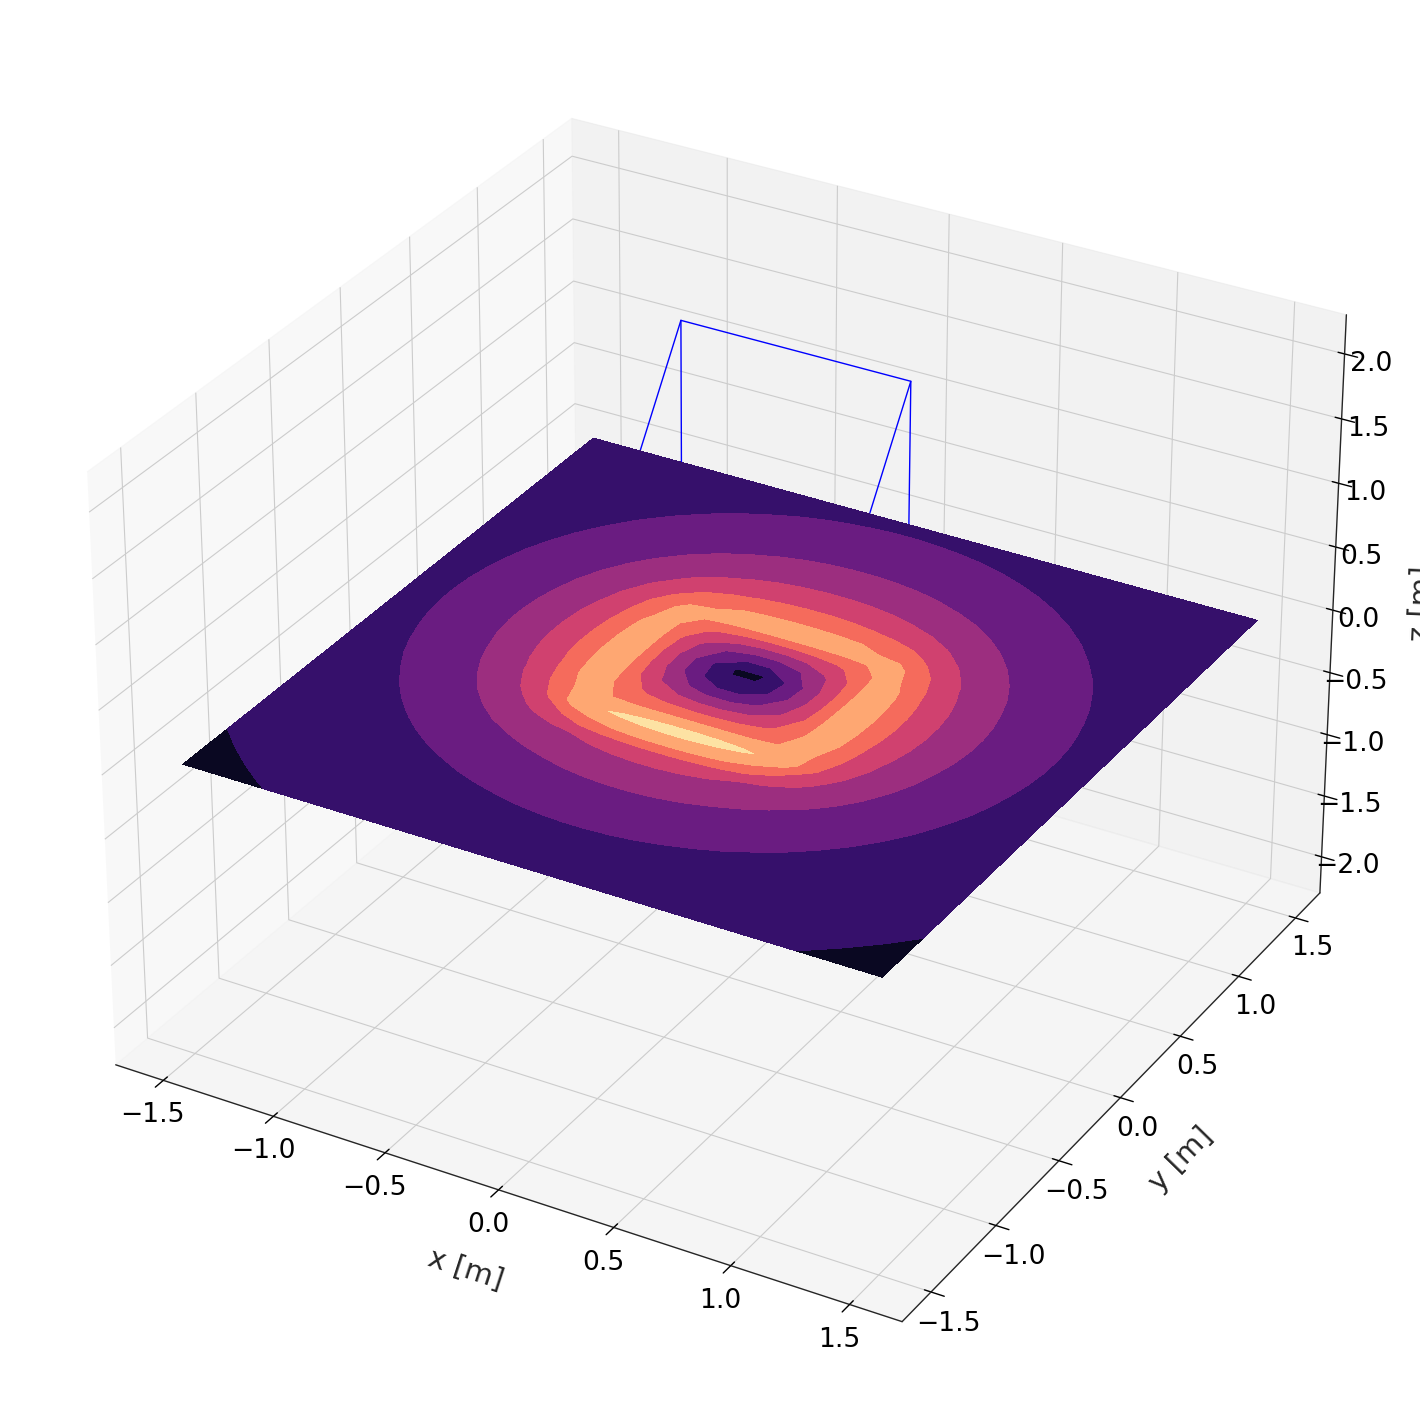

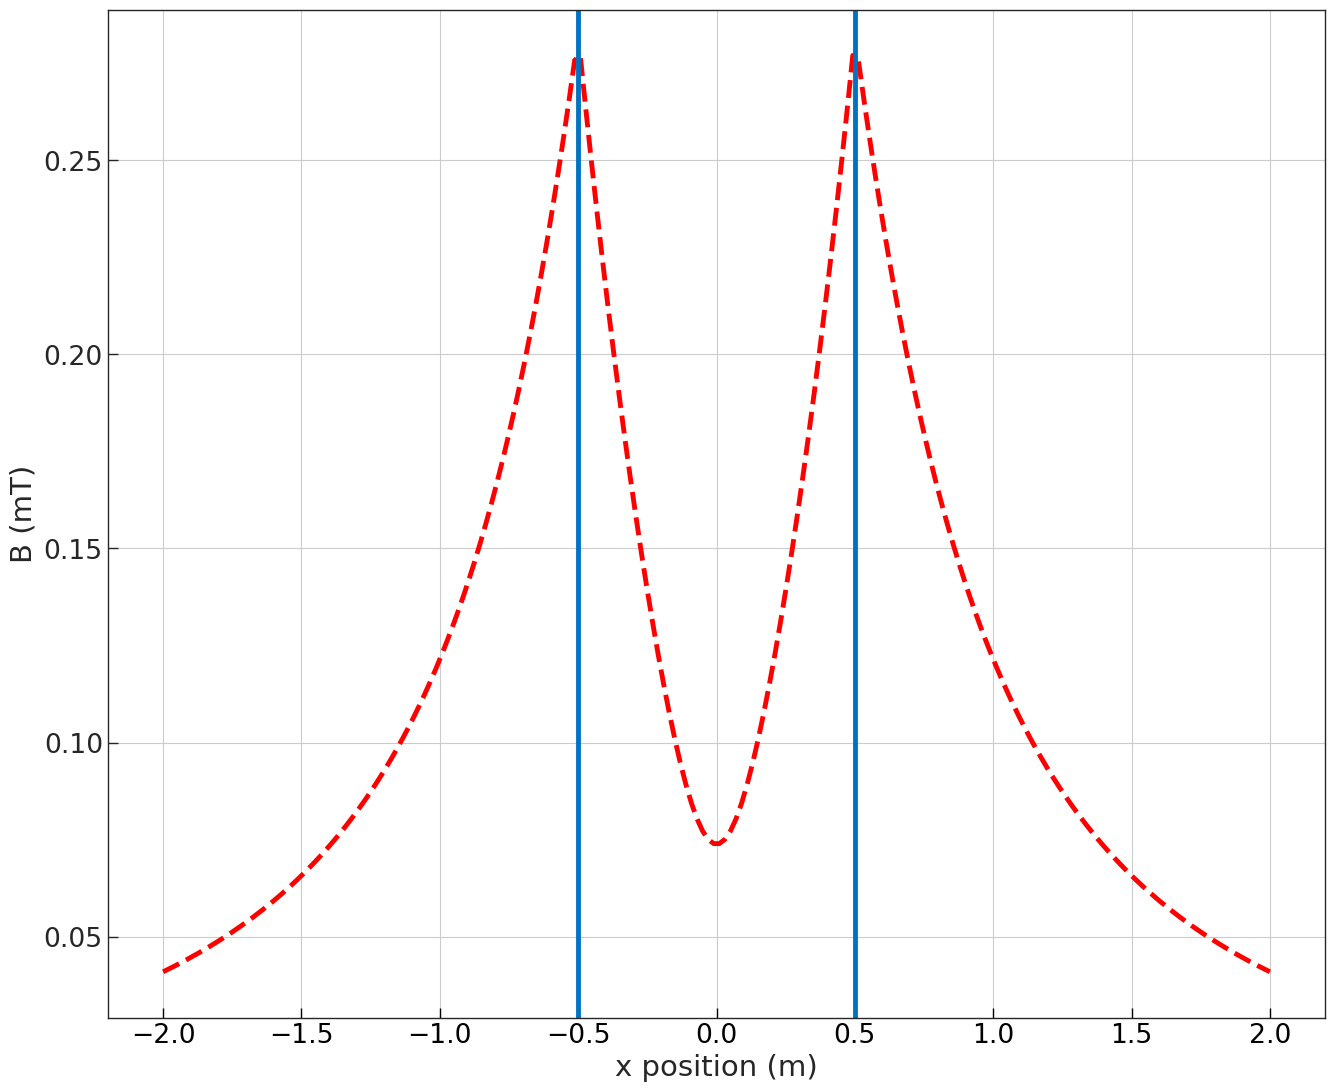

In [8]:
from bluemira.magnetostatics.trapezoidal_prism import TrapezoidalPrismCurrentSource

source = TrapezoidalPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 0, 2]),
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    0.5,
    0.5,
    np.pi * 3 / 8,
    np.pi * 3 / 8,
    1e6,
)
# source.rotate(35,"z")
ax = Plot3D()
x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
xx, yy = np.meshgrid(x, y)
zz = np.zeros_like(xx)
bx, by, bz = source.field(xx, yy, zz)
B = np.sqrt(bx**2 + by**2 + bz**2)
source.plot(ax=ax)
ax.contourf(xx, yy, B, zdir="z", offset=0.0, cmap="magma")
plt.show()
# source.rotate(-35,"z")
n = 200
x = np.linspace(-2, 2, n)
y = np.zeros(n)
z = np.zeros(n)
bx, by, bz = source.field(x, y, z)
B = np.sqrt(bx**2 + by**2 + bz**2)
fig = plt.figure()
plt.plot(x, B, "r--")
plt.axvline(x=0.5)
plt.axvline(x=-0.5)
plt.grid("True")
plt.ylabel("B (mT)")
plt.xlabel("x position (m)")
plt.show()

Yet to find the source of this discrepancy or whether it is in the paper that was used to contruct this method.

### Alternative from textbook

Looked into a textbook (MHD Forces in Magnets - can't find ebook of it only hardback) and found comparisons between straight square conductors and a central filament. Helped convince me that above was definitely wrong and also for help in polyhedral wires method. 

#### Infinite straight conductor

Textbook found that a single infinitely long wire placed at centre of square conductor was a good approximation for the external (with respect to square crtoss section) magnetic field. Increasing the number of wires by breaking the shape into numerous squares naturall improves external field, but also then the internal field starts to coonverge as well 

Then went to use equations from book that was used for the straight conductor as a comparison for the trapezoidal current source. Started this by working on simple cuboid shape using the finite straight conductor:

#### Finite straight conductor

Currently implementing but encountered some magnitude errors that I'm still trying to resolve.

#### infinitesimal square conductor

This was then going to be useful as this would allow for the trapezoidal aspects to be modelled as can just vary the width as height is increased (alternatively can also then use for the rest of the shape too). Started implementing.

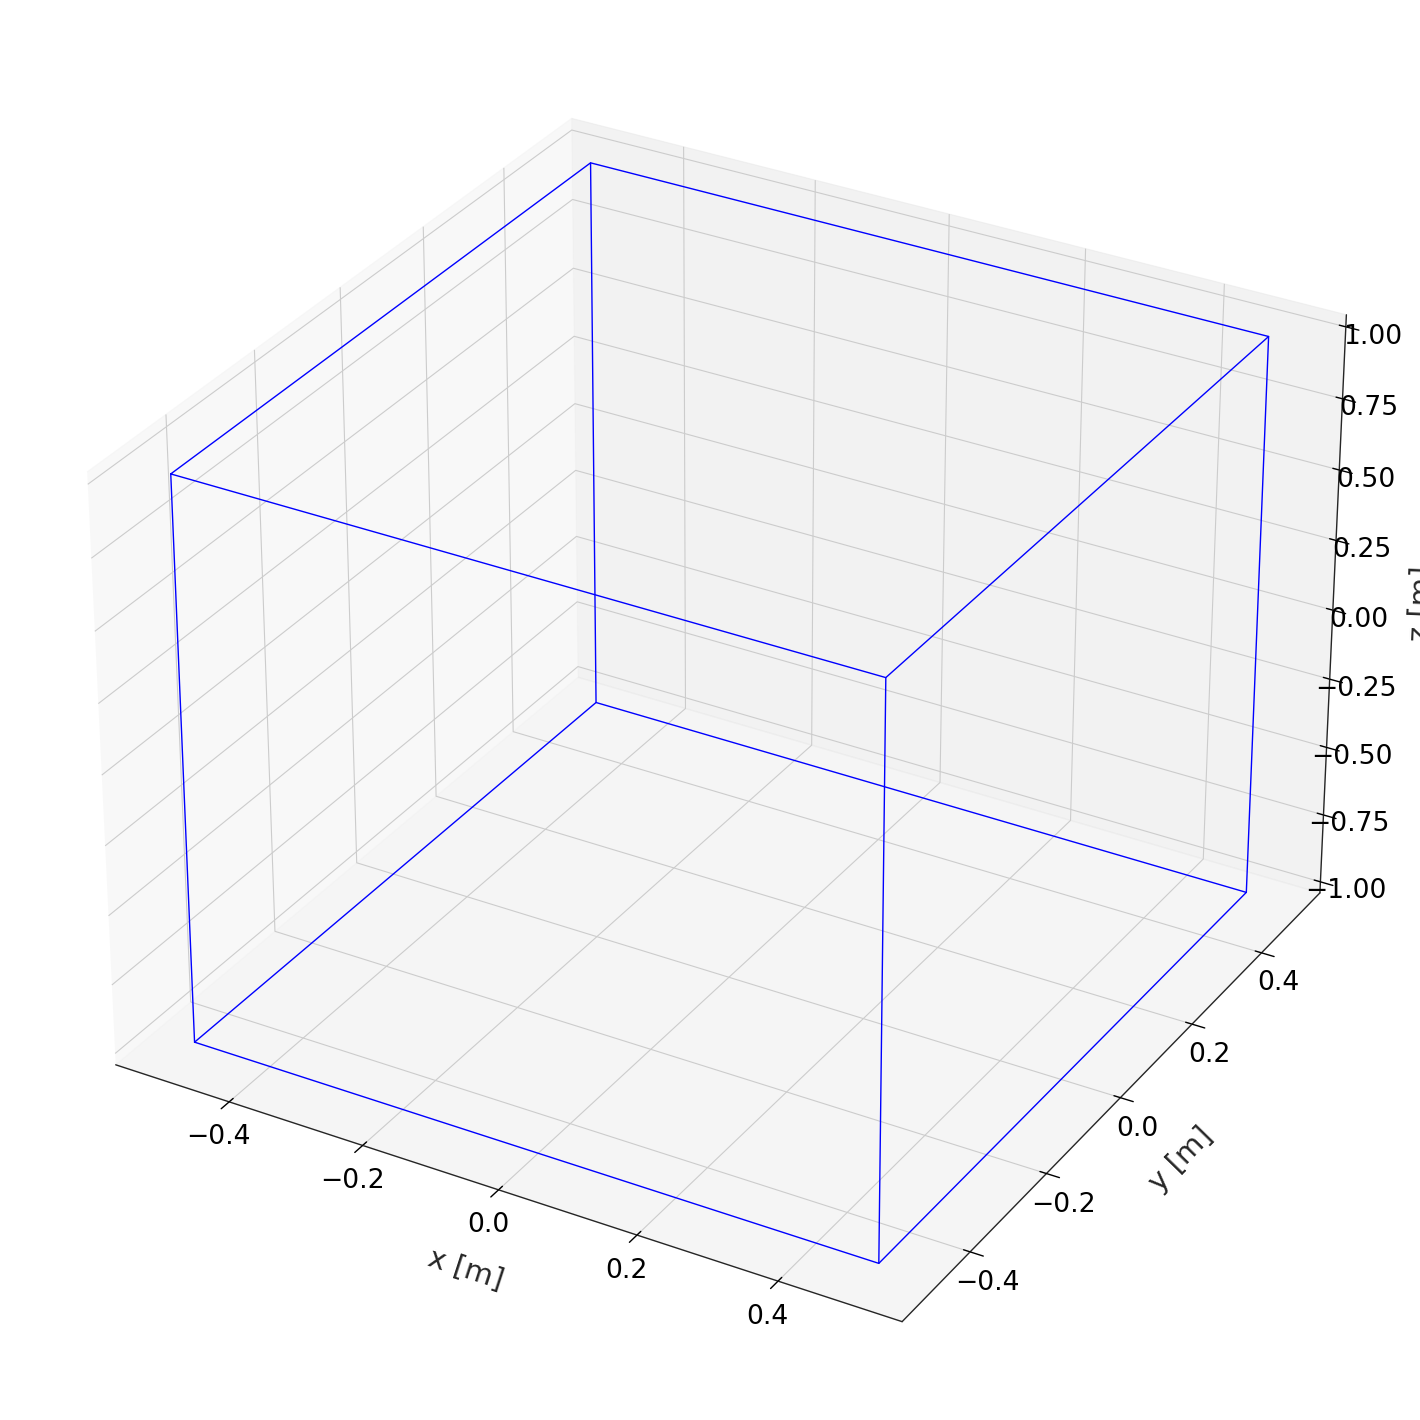

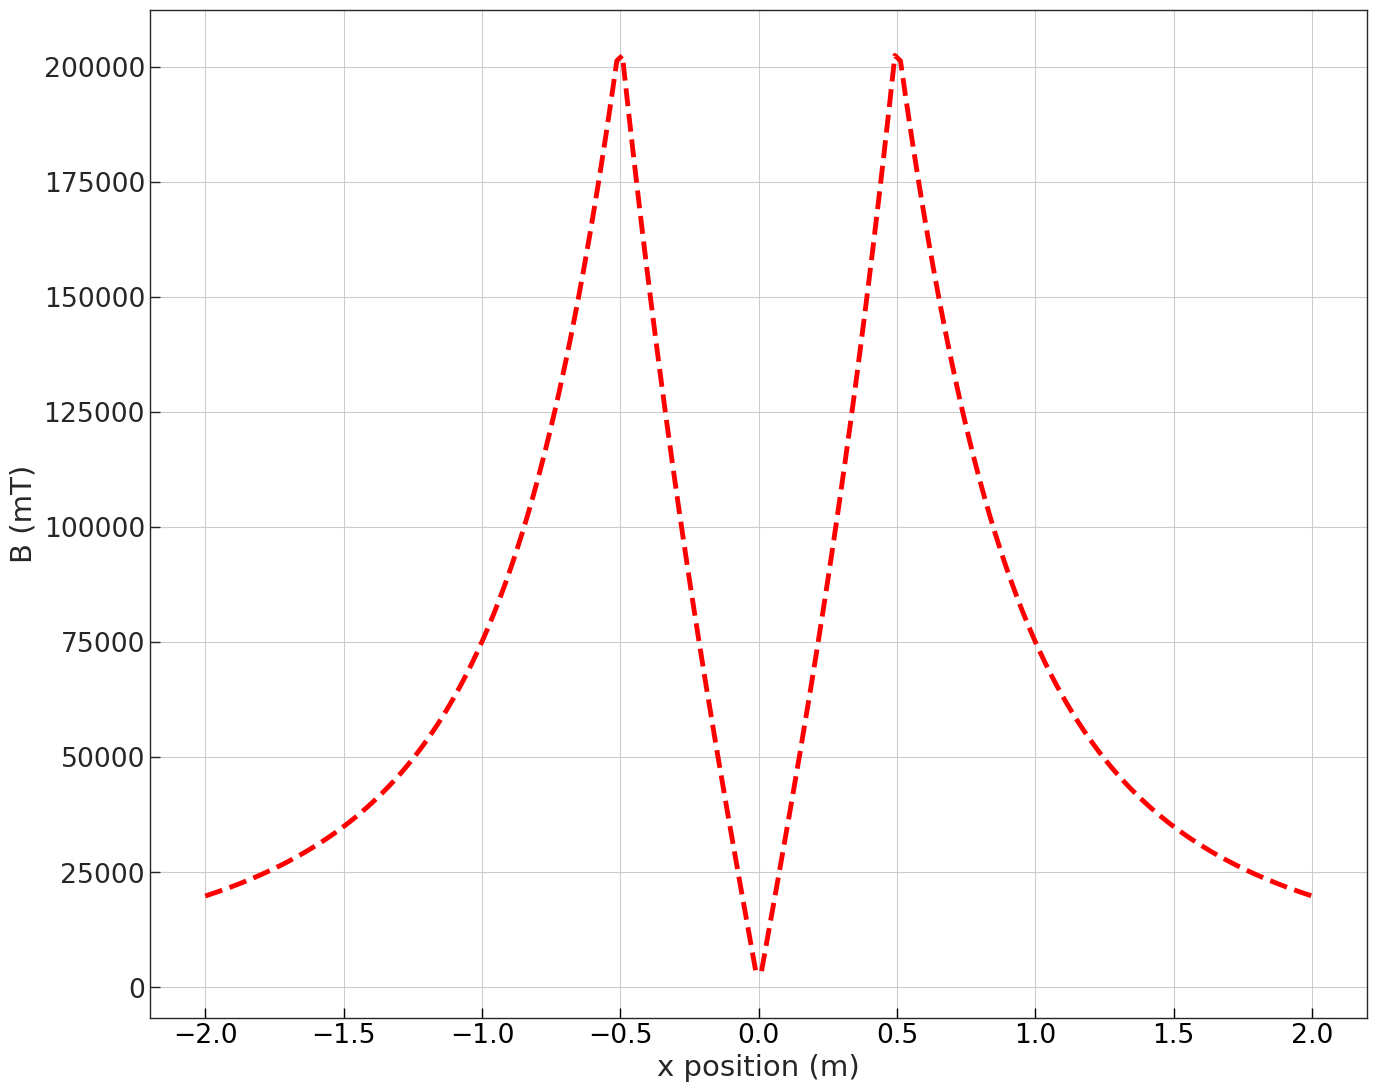

In [5]:
from bluemira.magnetostatics.trapezoidal_prism2 import TrapezoidalPrismCurrentSource2

source = TrapezoidalPrismCurrentSource2(
    np.array([0, 0, 0]),
    np.array([0, 2, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    1.0,
    1.0,
    np.pi * 4 / 4,
    np.pi * 4 / 4,
    1e6,
)
ax = Plot3D()
source.plot(ax=ax)
plt.show()
n = 200
x = np.linspace(-2, 2, n)
y = np.zeros(n)
z = np.zeros(n)
bx, by, bz = source.field(x, y, z)
B = np.sqrt(bx**2 + by**2 + bz**2)
fig = plt.figure()
plt.plot(x, B, "r--")
plt.grid("True")
plt.ylabel("B (mT)")
plt.xlabel("x position (m)")
plt.show()